# Part B - TensorFlow and Keras

### Mount and unzip dataset

In [0]:
# Import Google Drive and mount
from google.colab import drive
drive.mount('/content/gdrive')

# Unzip dataset
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"

### Prepare data and build assistive methods for Keras model

In [0]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import sys

tf.reset_default_graph()
sns.set_style("whitegrid")


def load_data(path):
    """
    Load the notMNIST dataset - note: for this to succeed the file data.h5
    needs to be located in your 'Colab Notebooks' folder in Google Drive.

    :param path: (string) The path to data.h5 in gDrive
    :raises: Exception (CatchAll) When error found loading data
    """
    try:
        with h5py.File(path, 'r') as hf:
            all_train = hf.get('trainData')
            all_test = hf.get('testData')
            np_train = np.array(all_train)
            np_test = np.array(all_test)
            return (np_train[:, :-1], np_train[:, -1],
                    np_test[:, :-1], np_test[:, -1])
    except Exception as e:
        print("There was an issue extracting the data...")
        sys.exit(e)


def plot_charts(history, title):
    """
    Given a Keras history object, output the associated training and test
    accuracy and loss results in a chart.

    :param history: (keras-history-obj) The model history object
    :param title: (string) The chart title
    """
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(history.history['acc'], label="train_acc")
    plt.plot(history.history['val_acc'], label="val_acc")
    plt.plot(history.history['loss'], label="train_loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.title("Model Accuracy - {}".format(title))
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()


def _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=1, batch_size=None,
                              validation_split=0.1, plot_chart=True,
                              chart_title='Part B'):
    """

    Given a Keras sequential model with layers defined, compile, fit, and
    evaluate that model, outputting test loss, accuracy, and charts when done.

    :param model: (keras-model) The sequential Keras model with layers defined
    :return: x_train: (np-array) The training data feature set
    :return: y_train: (np-array) The training data class labels
    :return: x_test: (np-array) The test data feature set
    :return: y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%).
    :param plot_chart: (bool) If a chart is to be output, only works when
    epochs are implemented in model.
    :param chart_title: (string) The chart title specific to model
    """
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Prevents error:  Cannot interpret feed_dict key as Tensor
    # Stack OverFlow Explanation (link shortened): https://bit.ly/2VVOWpv
    model._make_predict_function()

    history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
                        validation_split=validation_split,
                        epochs=n_epochs)

    results_prob = model.evaluate(x_test, y_test)

    print("Test loss: {}\nTest Accuracy: {}".format(
        results_prob[0], results_prob[1]))

    if plot_chart:
        plot_charts(history, chart_title)

### Load the data from 'data.h5' in Colab directory & set number of epochs to use with multi-layer networks

In [0]:
train_x, train_y, test_x, test_y = load_data('data.h5')
training_epochs = 15

## Part i - Benchmarks

### Run single layer SoftMax classifier benchmark on training and test data

In [4]:
def run_single_layer_softmax_benchmark(x_train, y_train, x_test, y_test,
                                       n_epochs=1, batch_size=0,
                                       validation_split=0.0, plot_chart=False):
    """
    Run the single layer Keras SoftMax classifier to get benchmark results for
    further testing.

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=tf.nn.softmax,
                              input_shape=(784,))])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart)


print("\nSingle Layer - SoftMax Classifier Benchmark:")
run_single_layer_softmax_benchmark(train_x, train_y, test_x, test_y,
                                   n_epochs=1, batch_size=256,
                                   validation_split=0.1, plot_chart=False)


Single Layer - SoftMax Classifier Benchmark:
Instructions for updating:
Colocations handled automatically by placer.
Train on 180000 samples, validate on 20000 samples
17000/17000 [==============================] - 1s 41us/sample - loss: 0.5770 - acc: 0.8510
Test loss: 0.5769695603006026
Test Accuracy: 0.8510000109672546


## Part ii - Scaling Up NN Layers

### Run two layer fully-connected NN with single layer of ReLu activation neurons connected to SoftMax layer




Two Layers - 1 ReLu / 1 SoftMax Classifier:
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 3s 18us/sample - loss: 0.5313 - acc: 0.8464 - val_loss: 0.4478 - val_acc: 0.8692
Epoch 2/15
180000/180000 [==============================] - 3s 17us/sample - loss: 0.4087 - acc: 0.8809 - val_loss: 0.4177 - val_acc: 0.8775
Epoch 3/15
180000/180000 [==============================] - 3s 18us/sample - loss: 0.3673 - acc: 0.8927 - val_loss: 0.3992 - val_acc: 0.8840
Epoch 4/15
180000/180000 [==============================] - 3s 17us/sample - loss: 0.3420 - acc: 0.9000 - val_loss: 0.3850 - val_acc: 0.8888
Epoch 5/15
180000/180000 [==============================] - 3s 17us/sample - loss: 0.3213 - acc: 0.9061 - val_loss: 0.3923 - val_acc: 0.8895
Epoch 6/15
180000/180000 [==============================] - 3s 19us/sample - loss: 0.3047 - acc: 0.9107 - val_loss: 0.3761 - val_acc: 0.8933
Epoch 7/15
180000/180000 [==============================] 

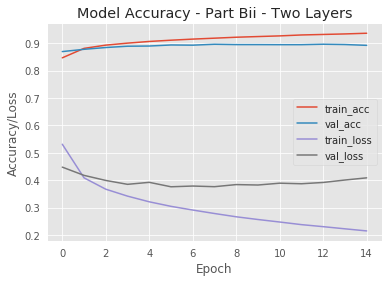

In [5]:
def run_two_layer_relu_softmax(x_train, y_train, x_test, y_test,
                               n_epochs=1, batch_size=0, validation_split=0.0,
                               plot_chart=True,
                               chart_title='Part Bii - Two Layers'):
    """
    Run the two layer Keras NN with:
        -L1 200 Neurons (ReLu)
        -L2 SoftMax

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    :param chart_title: (string) The chart title
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


print("\nTwo Layers - 1 ReLu / 1 SoftMax Classifier:")
run_two_layer_relu_softmax(train_x, train_y, test_x, test_y,
                           n_epochs=training_epochs, batch_size=256,
                           validation_split=0.1, plot_chart=True)


### Run three layer fully-connected NN with two layers of ReLu activation neurons connected to SoftMax layer


Three Layers - 2 ReLu / 1 SoftMax Classifier:
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.4778 - acc: 0.8579 - val_loss: 0.3939 - val_acc: 0.8820
Epoch 2/15
180000/180000 [==============================] - 3s 19us/sample - loss: 0.3523 - acc: 0.8925 - val_loss: 0.3621 - val_acc: 0.8910
Epoch 3/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3056 - acc: 0.9063 - val_loss: 0.3435 - val_acc: 0.8982
Epoch 4/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.2728 - acc: 0.9156 - val_loss: 0.3473 - val_acc: 0.8965
Epoch 5/15
180000/180000 [==============================] - 3s 19us/sample - loss: 0.2463 - acc: 0.9225 - val_loss: 0.3386 - val_acc: 0.9002
Epoch 6/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.2243 - acc: 0.9296 - val_loss: 0.3447 - val_acc: 0.9020
Epoch 7/15
180000/180000 [==============================

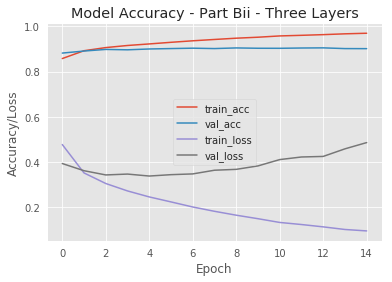

In [6]:
def run_three_layer_relu_softmax(x_train, y_train, x_test, y_test,
                                 n_epochs=1, batch_size=0,
                                 validation_split=0.0, plot_chart=True,
                                 chart_title='Part Bii - Three Layers'):
    """
    Run the three layer Keras NN with:
        -L1 400 Neurons (ReLu)
        -L2 200 Neurons (ReLu)
        -L3 SoftMax

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    :param chart_title: (string) The chart title
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dense(200, activation=tf.nn.relu, ),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


print("\nThree Layers - 2 ReLu / 1 SoftMax Classifier:")
run_three_layer_relu_softmax(train_x, train_y, test_x, test_y,
                             n_epochs=training_epochs, batch_size=256,
                             validation_split=0.1, plot_chart=True)

### Run four layer fully-connected NN with three layers of ReLu activation neurons connected to SoftMax layer


Four Layers - 3 ReLu / 1 SoftMax Classifier:
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 3s 19us/sample - loss: 0.4612 - acc: 0.8599 - val_loss: 0.3921 - val_acc: 0.8813
Epoch 2/15
180000/180000 [==============================] - 3s 18us/sample - loss: 0.3389 - acc: 0.8952 - val_loss: 0.3564 - val_acc: 0.8921
Epoch 3/15
180000/180000 [==============================] - 3s 18us/sample - loss: 0.2922 - acc: 0.9083 - val_loss: 0.3261 - val_acc: 0.9017
Epoch 4/15
180000/180000 [==============================] - 3s 18us/sample - loss: 0.2588 - acc: 0.9176 - val_loss: 0.3268 - val_acc: 0.9026
Epoch 5/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.2300 - acc: 0.9265 - val_loss: 0.3337 - val_acc: 0.9025
Epoch 6/15
180000/180000 [==============================] - 4s 21us/sample - loss: 0.2057 - acc: 0.9336 - val_loss: 0.3347 - val_acc: 0.9058
Epoch 7/15
180000/180000 [==============================]

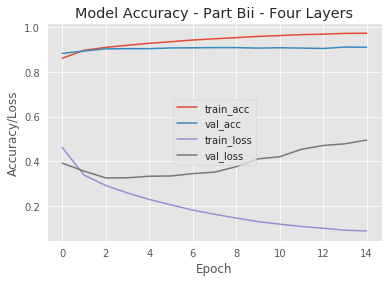

In [7]:
def run_four_layer_relu_softmax(x_train, y_train, x_test, y_test,
                                n_epochs=1, batch_size=0,
                                validation_split=0.0, plot_chart=True,
                                chart_title='Part Bii - Four Layers'):
    """
    Run the four layer Keras NN with:
        -L1 600 Neurons (ReLu)
        -L2 400 Neurons (ReLu)
        -L3 200 Neurons (ReLu)
        -L4 SoftMax

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    :param chart_title: (string) The chart title
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dense(400, activation=tf.nn.relu, ),
        tf.keras.layers.Dense(200, activation=tf.nn.relu, ),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


print("\nFour Layers - 3 ReLu / 1 SoftMax Classifier:")
run_four_layer_relu_softmax(train_x, train_y, test_x, test_y,
                            n_epochs=training_epochs, batch_size=256,
                            validation_split=0.1, plot_chart=True)

### Run five layer fully-connected NN with four layers of ReLu activation neurons connected to SoftMax layer


Five Layers - 5 ReLu / 1 SoftMax Classifier:
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 21us/sample - loss: 0.4615 - acc: 0.8593 - val_loss: 0.3899 - val_acc: 0.8803
Epoch 2/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3427 - acc: 0.8934 - val_loss: 0.3420 - val_acc: 0.8954
Epoch 3/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.2941 - acc: 0.9072 - val_loss: 0.3291 - val_acc: 0.8999
Epoch 4/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.2610 - acc: 0.9172 - val_loss: 0.3373 - val_acc: 0.9028
Epoch 5/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.2333 - acc: 0.9242 - val_loss: 0.3269 - val_acc: 0.9033
Epoch 6/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.2113 - acc: 0.9317 - val_loss: 0.3334 - val_acc: 0.9051
Epoch 7/15
180000/180000 [==============================]

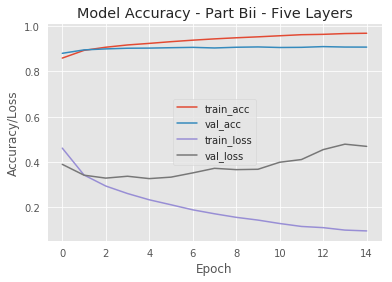

In [8]:
def run_five_layer_relu_softmax(x_train, y_train, x_test, y_test,
                                n_epochs=1, batch_size=0,
                                validation_split=0.0, plot_chart=True,
                                chart_title='Part Bii - Five Layers'):
    """
    Run the five layer Keras NN with:
        -L1 800 Neurons (ReLu)
        -L2 600 Neurons (ReLu)
        -L3 400 Neurons (ReLu)
        -L4 200 Neurons (ReLu)
        -L5 SoftMax

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    :param chart_title: (string) The chart title
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(800, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dense(600, activation=tf.nn.relu),
        tf.keras.layers.Dense(400, activation=tf.nn.relu, ),
        tf.keras.layers.Dense(200, activation=tf.nn.relu, ),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


print("\nFive Layers - 5 ReLu / 1 SoftMax Classifier:")
run_five_layer_relu_softmax(train_x, train_y, test_x, test_y,
                            n_epochs=training_epochs, batch_size=256,
                            validation_split=0.1, plot_chart=True)


## Part iii - Addressing Overfitting

### Apply drop out (rate 0.1 - 0.5) to two deepest networks from part ii

#### Four Layers


Four Layers - Dropout Rate 0.1
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.4869 - acc: 0.8518 - val_loss: 0.3833 - val_acc: 0.8813
Epoch 2/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.3682 - acc: 0.8863 - val_loss: 0.3688 - val_acc: 0.8879
Epoch 3/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.3265 - acc: 0.8979 - val_loss: 0.3363 - val_acc: 0.8977
Epoch 4/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.2987 - acc: 0.9060 - val_loss: 0.3359 - val_acc: 0.8967
Epoch 5/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.2767 - acc: 0.9123 - val_loss: 0.3248 - val_acc: 0.9014
Epoch 6/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.2586 - acc: 0.9169 - val_loss: 0.3200 - val_acc: 0.9071
Epoch 7/15
180000/180000 [==============================] - 5s 27us/sam

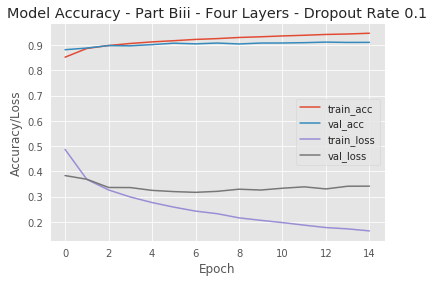


Four Layers - Dropout Rate 0.2
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.5142 - acc: 0.8444 - val_loss: 0.4090 - val_acc: 0.8744
Epoch 2/15
180000/180000 [==============================] - 5s 25us/sample - loss: 0.3974 - acc: 0.8774 - val_loss: 0.3618 - val_acc: 0.8896
Epoch 3/15
180000/180000 [==============================] - 4s 23us/sample - loss: 0.3595 - acc: 0.8881 - val_loss: 0.3462 - val_acc: 0.8937
Epoch 4/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.3341 - acc: 0.8957 - val_loss: 0.3387 - val_acc: 0.8960
Epoch 5/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.3154 - acc: 0.9008 - val_loss: 0.3269 - val_acc: 0.9003
Epoch 6/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.2982 - acc: 0.9057 - val_loss: 0.3262 - val_acc: 0.9018
Epoch 7/15
180000/180000 [==============================] - 4s 22us/sam

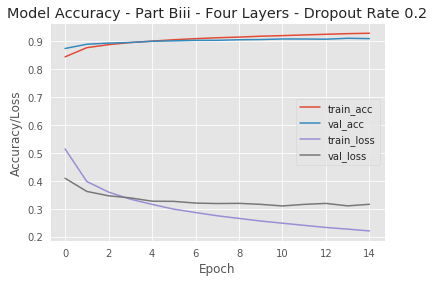


Four Layers - Dropout Rate 0.3
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.5474 - acc: 0.8350 - val_loss: 0.4167 - val_acc: 0.8704
Epoch 2/15
180000/180000 [==============================] - 4s 21us/sample - loss: 0.4320 - acc: 0.8684 - val_loss: 0.3812 - val_acc: 0.8823
Epoch 3/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.3943 - acc: 0.8791 - val_loss: 0.3644 - val_acc: 0.8879
Epoch 4/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3706 - acc: 0.8860 - val_loss: 0.3492 - val_acc: 0.8936
Epoch 5/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3529 - acc: 0.8904 - val_loss: 0.3417 - val_acc: 0.8982
Epoch 6/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.3381 - acc: 0.8942 - val_loss: 0.3339 - val_acc: 0.8974
Epoch 7/15
180000/180000 [==============================] - 4s 22us/sam

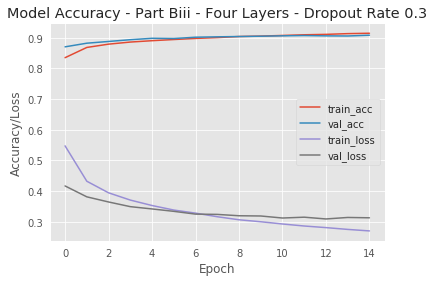


Four Layers - Dropout Rate 0.4
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.5947 - acc: 0.8216 - val_loss: 0.4417 - val_acc: 0.8656
Epoch 2/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.4690 - acc: 0.8577 - val_loss: 0.4006 - val_acc: 0.8788
Epoch 3/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4323 - acc: 0.8684 - val_loss: 0.3829 - val_acc: 0.8820
Epoch 4/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.4099 - acc: 0.8751 - val_loss: 0.3659 - val_acc: 0.8914
Epoch 5/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.3911 - acc: 0.8805 - val_loss: 0.3572 - val_acc: 0.8926
Epoch 6/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.3776 - acc: 0.8839 - val_loss: 0.3522 - val_acc: 0.8918
Epoch 7/15
180000/180000 [==============================] - 4s 24us/sam

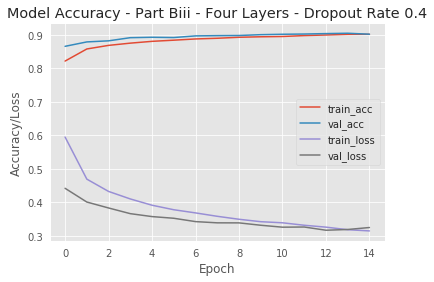


Four Layers - Dropout Rate 0.5
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.6587 - acc: 0.8027 - val_loss: 0.4664 - val_acc: 0.8582
Epoch 2/15
180000/180000 [==============================] - 4s 23us/sample - loss: 0.5155 - acc: 0.8449 - val_loss: 0.4333 - val_acc: 0.8702
Epoch 3/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4756 - acc: 0.8572 - val_loss: 0.4120 - val_acc: 0.8780
Epoch 4/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4527 - acc: 0.8632 - val_loss: 0.3890 - val_acc: 0.8824
Epoch 5/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4355 - acc: 0.8681 - val_loss: 0.3890 - val_acc: 0.8852
Epoch 6/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4233 - acc: 0.8718 - val_loss: 0.3793 - val_acc: 0.8876
Epoch 7/15
180000/180000 [==============================] - 4s 22us/sam

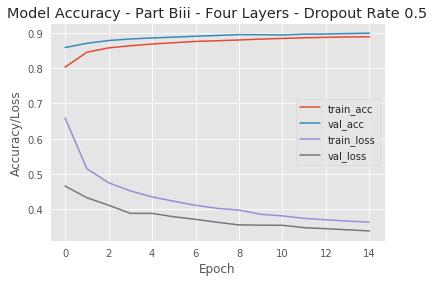

In [10]:
def run_four_layers_dropout(x_train, y_train, x_test, y_test, n_epochs=1,
                            batch_size=0, dropout_rate=0.0,
                            validation_split=0.0, plot_chart=True):
    """
    Apply dropout to each layer of the NN at a rate specified by input param.

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param dropout_rate: (float) The dropout rate to use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    """

    chart_title = "Part Biii - Four Layers - Dropout Rate {}".format(
        str(dropout_rate))

    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(400, activation=tf.nn.relu, ),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(200, activation=tf.nn.relu, ),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


rates = [0.1, 0.2, 0.3, 0.4, 0.5]
for rate in rates:
    print("\nFour Layers - Dropout Rate {}".format(rate))
    run_four_layers_dropout(train_x, train_y, test_x, test_y,
                            n_epochs=training_epochs, batch_size=256,
                            dropout_rate=rate, validation_split=0.1,
                            plot_chart=True)

#### Five Layers


Five Layers - Dropout Rate 0.1
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.4867 - acc: 0.8516 - val_loss: 0.3912 - val_acc: 0.8776
Epoch 2/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.3697 - acc: 0.8858 - val_loss: 0.3532 - val_acc: 0.8910
Epoch 3/15
180000/180000 [==============================] - 5s 30us/sample - loss: 0.3290 - acc: 0.8976 - val_loss: 0.3472 - val_acc: 0.8946
Epoch 4/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.3006 - acc: 0.9051 - val_loss: 0.3338 - val_acc: 0.8982
Epoch 5/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.2791 - acc: 0.9121 - val_loss: 0.3198 - val_acc: 0.9023
Epoch 6/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.2602 - acc: 0.9176 - val_loss: 0.3124 - val_acc: 0.9066
Epoch 7/15
180000/180000 [==============================] - 5s 27us/sam

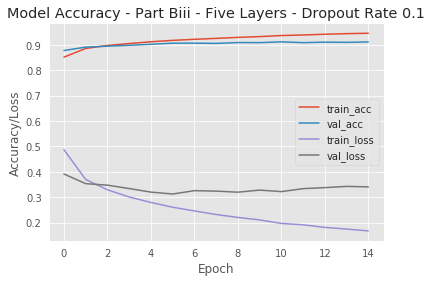


Five Layers - Dropout Rate 0.2
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.5176 - acc: 0.8415 - val_loss: 0.4088 - val_acc: 0.8752
Epoch 2/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4026 - acc: 0.8769 - val_loss: 0.3690 - val_acc: 0.8882
Epoch 3/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.3606 - acc: 0.8883 - val_loss: 0.3513 - val_acc: 0.8943
Epoch 4/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.3361 - acc: 0.8965 - val_loss: 0.3363 - val_acc: 0.8977
Epoch 5/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.3145 - acc: 0.9018 - val_loss: 0.3295 - val_acc: 0.9002
Epoch 6/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.3010 - acc: 0.9062 - val_loss: 0.3196 - val_acc: 0.9043
Epoch 7/15
180000/180000 [==============================] - 4s 24us/sam

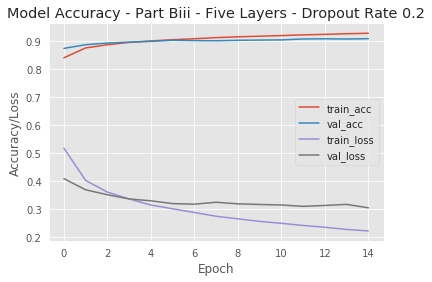


Five Layers - Dropout Rate 0.3
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.5550 - acc: 0.8331 - val_loss: 0.4242 - val_acc: 0.8699
Epoch 2/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4350 - acc: 0.8674 - val_loss: 0.3871 - val_acc: 0.8834
Epoch 3/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.3966 - acc: 0.8785 - val_loss: 0.3569 - val_acc: 0.8912
Epoch 4/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.3704 - acc: 0.8871 - val_loss: 0.3515 - val_acc: 0.8952
Epoch 5/15
180000/180000 [==============================] - 5s 30us/sample - loss: 0.3518 - acc: 0.8916 - val_loss: 0.3383 - val_acc: 0.8974
Epoch 6/15
180000/180000 [==============================] - 5s 30us/sample - loss: 0.3400 - acc: 0.8958 - val_loss: 0.3304 - val_acc: 0.9007
Epoch 7/15
180000/180000 [==============================] - 5s 27us/sam

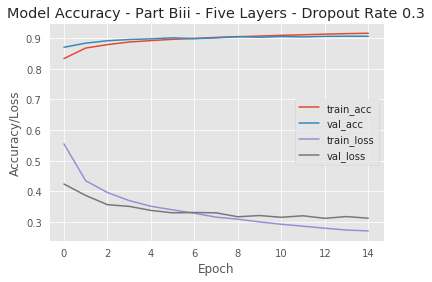


Five Layers - Dropout Rate 0.4
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.6065 - acc: 0.8171 - val_loss: 0.4554 - val_acc: 0.8631
Epoch 2/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4775 - acc: 0.8566 - val_loss: 0.4079 - val_acc: 0.8773
Epoch 3/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4367 - acc: 0.8694 - val_loss: 0.3831 - val_acc: 0.8847
Epoch 4/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.4128 - acc: 0.8758 - val_loss: 0.3710 - val_acc: 0.8890
Epoch 5/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.3958 - acc: 0.8809 - val_loss: 0.3573 - val_acc: 0.8932
Epoch 6/15
180000/180000 [==============================] - 5s 29us/sample - loss: 0.3804 - acc: 0.8849 - val_loss: 0.3576 - val_acc: 0.8931
Epoch 7/15
180000/180000 [==============================] - 5s 30us/sam

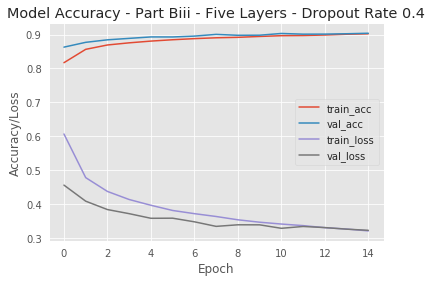


Five Layers - Dropout Rate 0.5
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.6882 - acc: 0.7932 - val_loss: 0.4907 - val_acc: 0.8579
Epoch 2/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.5240 - acc: 0.8445 - val_loss: 0.4339 - val_acc: 0.8726
Epoch 3/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.4889 - acc: 0.8549 - val_loss: 0.4077 - val_acc: 0.8780
Epoch 4/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.4622 - acc: 0.8625 - val_loss: 0.3992 - val_acc: 0.8814
Epoch 5/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.4428 - acc: 0.8681 - val_loss: 0.3810 - val_acc: 0.8857
Epoch 6/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.4322 - acc: 0.8712 - val_loss: 0.3797 - val_acc: 0.8874
Epoch 7/15
180000/180000 [==============================] - 5s 28us/sam

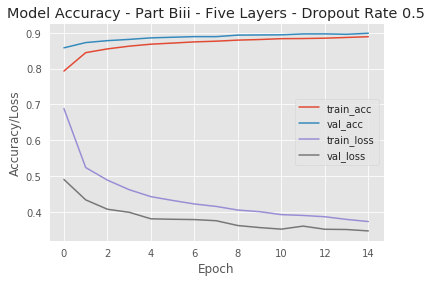

In [11]:
def run_five_layers_dropout(x_train, y_train, x_test, y_test, n_epochs=1,
                            batch_size=0, dropout_rate=0.0,
                            validation_split=0.0, plot_chart=True):
    """
    Apply dropout to each layer of the NN at a rate specified by input param.

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param dropout_rate: (float) The dropout rate to use
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    """
    chart_title = "Part Biii - Five Layers - Dropout Rate {}".format(
        str(dropout_rate))

    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(800, activation=tf.nn.relu, input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(600, activation=tf.nn.relu),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(400, activation=tf.nn.relu, ),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(200, activation=tf.nn.relu, ),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                              n_epochs=n_epochs, batch_size=batch_size,
                              validation_split=validation_split,
                              plot_chart=plot_chart, chart_title=chart_title)


rates = [0.1, 0.2, 0.3, 0.4, 0.5]
for rate in rates:
    print("\nFive Layers - Dropout Rate {}".format(rate))
    run_five_layers_dropout(train_x, train_y, test_x, test_y,
                            n_epochs=training_epochs, batch_size=256,
                            dropout_rate=rate, validation_split=0.1,
                            plot_chart=True)

### Apply L1 regularization to two deepest networks from part ii

#### Four Layers


Four Layers - L1 Regularization Rate 0.01
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 28us/sample - loss: 1.4614 - acc: 0.8465 - val_loss: 0.7531 - val_acc: 0.8575
Epoch 2/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.6463 - acc: 0.8698 - val_loss: 0.5930 - val_acc: 0.8743
Epoch 3/15
180000/180000 [==============================] - 4s 23us/sample - loss: 0.5587 - acc: 0.8786 - val_loss: 0.5456 - val_acc: 0.8798
Epoch 4/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.5275 - acc: 0.8833 - val_loss: 0.5283 - val_acc: 0.8835
Epoch 5/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.5122 - acc: 0.8864 - val_loss: 0.5151 - val_acc: 0.8871
Epoch 6/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.5010 - acc: 0.8890 - val_loss: 0.5162 - val_acc: 0.8842
Epoch 7/15
180000/180000 [==============================] - 

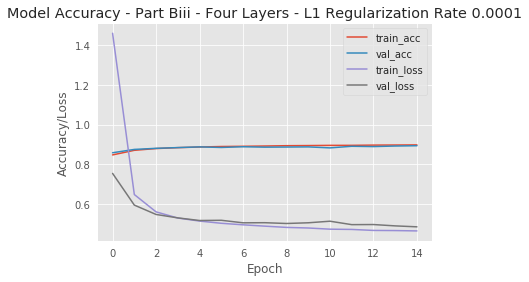


Four Layers - L2 Regularization Rate 0.01
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 28us/sample - loss: 0.5953 - acc: 0.8591 - val_loss: 0.5176 - val_acc: 0.8757
Epoch 2/15
180000/180000 [==============================] - 4s 22us/sample - loss: 0.4653 - acc: 0.8910 - val_loss: 0.4733 - val_acc: 0.8899
Epoch 3/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.4200 - acc: 0.9014 - val_loss: 0.4464 - val_acc: 0.8939
Epoch 4/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3935 - acc: 0.9086 - val_loss: 0.4350 - val_acc: 0.8981
Epoch 5/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3771 - acc: 0.9123 - val_loss: 0.4433 - val_acc: 0.8953
Epoch 6/15
180000/180000 [==============================] - 4s 20us/sample - loss: 0.3648 - acc: 0.9162 - val_loss: 0.4334 - val_acc: 0.8981
Epoch 7/15
180000/180000 [==============================] - 

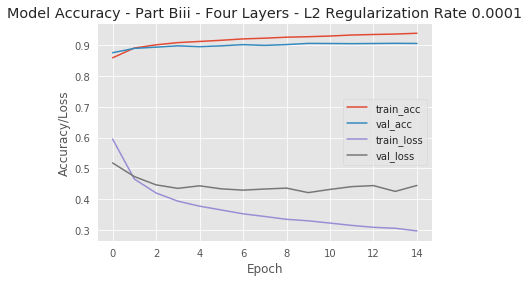

In [14]:
def run_reg_four_layers(x_train, y_train, x_test, y_test, n_epochs=1,
                        batch_size=0, reg_type='L1', reg_rate=0.01,
                        validation_split=0.0, plot_chart=True):
    """
    Apply regularization to each layer of the NN at a rate specified by input
    param.

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param reg_type: (str) The regularization type to use, valid values
    are 'L1 and 'L2'
    :param reg_rate: (float) The regularization rate
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    """
    chart_title = "Part Biii - Four Layers - {} Regularization Rate {}".format(
        reg_type, str(reg_rate))

    kernel_reg = None
    if 'L1' in reg_type:
        kernel_reg = tf.keras.regularizers.l1(reg_rate)
    elif 'L2' in reg_type:
        kernel_reg = tf.keras.regularizers.l2(reg_rate)

    if kernel_reg:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(
                600, activation=tf.nn.relu, input_shape=(784,),
                kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(
                400, activation=tf.nn.relu, kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(
                200, activation=tf.nn.relu, kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

        _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                                  n_epochs=n_epochs, batch_size=batch_size,
                                  validation_split=validation_split,
                                  plot_chart=plot_chart,
                                  chart_title=chart_title)
    else:
        print("The regularization type was not recognised, please input "
              "either 'L1' or 'L2' as regularization type")


print("\nFour Layers - L1 Regularization Rate 0.01")
run_reg_four_layers(train_x, train_y, test_x, test_y, n_epochs=training_epochs,
                    batch_size=256, reg_type='L1', reg_rate=0.0001,
                    validation_split=0.1, plot_chart=True)

print("\nFour Layers - L2 Regularization Rate 0.01")
run_reg_four_layers(train_x, train_y, test_x, test_y, n_epochs=training_epochs,
                    batch_size=256, reg_type='L2', reg_rate=0.0001,
                    validation_split=0.1, plot_chart=True)

#### Five Layers


Five Layers - L1 Regularization Rate 0.01
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 6s 31us/sample - loss: 1.7562 - acc: 0.8449 - val_loss: 0.7968 - val_acc: 0.8526
Epoch 2/15
180000/180000 [==============================] - 4s 23us/sample - loss: 0.6682 - acc: 0.8701 - val_loss: 0.6002 - val_acc: 0.8790
Epoch 3/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.5752 - acc: 0.8784 - val_loss: 0.5655 - val_acc: 0.8791
Epoch 4/15
180000/180000 [==============================] - 5s 26us/sample - loss: 0.5404 - acc: 0.8840 - val_loss: 0.5471 - val_acc: 0.8820
Epoch 5/15
180000/180000 [==============================] - 4s 25us/sample - loss: 0.5233 - acc: 0.8868 - val_loss: 0.5466 - val_acc: 0.8791
Epoch 6/15
180000/180000 [==============================] - 5s 25us/sample - loss: 0.5106 - acc: 0.8895 - val_loss: 0.5231 - val_acc: 0.8862
Epoch 7/15
180000/180000 [==============================] - 

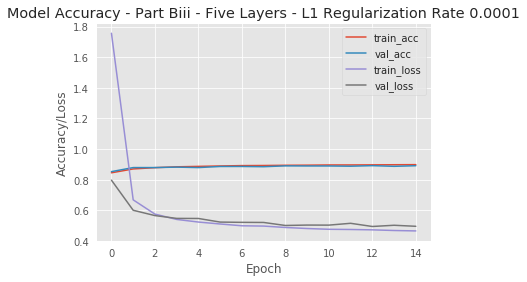


Five Layers - L2 Regularization Rate 0.01
Train on 180000 samples, validate on 20000 samples
Epoch 1/15
180000/180000 [==============================] - 5s 30us/sample - loss: 0.6421 - acc: 0.8586 - val_loss: 0.5476 - val_acc: 0.8765
Epoch 2/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4956 - acc: 0.8887 - val_loss: 0.4876 - val_acc: 0.8897
Epoch 3/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4453 - acc: 0.8982 - val_loss: 0.4634 - val_acc: 0.8936
Epoch 4/15
180000/180000 [==============================] - 4s 24us/sample - loss: 0.4139 - acc: 0.9052 - val_loss: 0.4590 - val_acc: 0.8923
Epoch 5/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.3951 - acc: 0.9097 - val_loss: 0.4430 - val_acc: 0.8976
Epoch 6/15
180000/180000 [==============================] - 5s 27us/sample - loss: 0.3812 - acc: 0.9130 - val_loss: 0.4388 - val_acc: 0.8975
Epoch 7/15
180000/180000 [==============================] - 

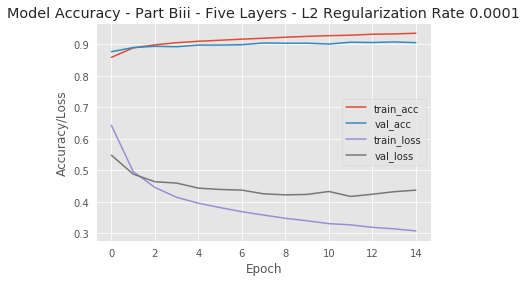

In [15]:
def run_reg_five_layers(x_train, y_train, x_test, y_test, n_epochs=1,
                        batch_size=0, reg_type='L1', reg_rate=0.01,
                        validation_split=0.0, plot_chart=True):
    """
    Apply regularization to each layer of the NN at a rate specified by input
    param.

    :param x_train: (np-array) The training data feature set
    :param y_train: (np-array) The training data class labels
    :param x_test: (np-array) The test data feature set
    :param y_test: (np-array) The training data class labels
    :param n_epochs: (int) The number of epochs to run, default None (all)
    :param batch_size: (int) The batch size, default 0 for full data set use
    :param reg_type: (str) The regularization type to use, valid values
    are 'L1 and 'L2'
    :param reg_rate: (float) The regularization rate
    :param validation_split: (float) The amount of training data to use as
    validation data, default 0.1 (10%)
    :param plot_chart: (bool) If a chart of results is to be output
    """
    chart_title = "Part Biii - Five Layers - {} Regularization Rate {}".format(
        reg_type, str(reg_rate))

    kernel_reg = None
    if 'L1' in reg_type:
        kernel_reg = tf.keras.regularizers.l1(reg_rate)
    elif 'L2' in reg_type:
        kernel_reg = tf.keras.regularizers.l2(reg_rate)

    if kernel_reg:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(
                800, activation=tf.nn.relu, input_shape=(784,),
                kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(
                600, activation=tf.nn.relu, kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(
                400, activation=tf.nn.relu, kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(
                200, activation=tf.nn.relu, kernel_regularizer=kernel_reg),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

        _run_compile_fit_evaluate(model, x_train, y_train, x_test, y_test,
                                  n_epochs=n_epochs, batch_size=batch_size,
                                  validation_split=validation_split,
                                  plot_chart=plot_chart,
                                  chart_title=chart_title)
    else:
        print("The regularization type was not recognised, please input "
              "either 'L1' or 'L2' as regularization type")


print("\nFive Layers - L1 Regularization Rate 0.001")
run_reg_five_layers(train_x, train_y, test_x, test_y, n_epochs=training_epochs,
                    batch_size=256, reg_type='L1', reg_rate=0.0001,
                    validation_split=0.1, plot_chart=True)

print("\nFive Layers - L2 Regularization Rate 0.001")
run_reg_five_layers(train_x, train_y, test_x, test_y, n_epochs=training_epochs,
                    batch_size=256, reg_type='L2', reg_rate=0.0001,
                    validation_split=0.1, plot_chart=True)
